<a href="https://colab.research.google.com/github/Igoof14/Practical-machine-learning/blob/main/GD_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Градиентный спуск. Практика

## Импорт библиотек, установка константных значений

In [93]:
import pandas as pd
import numpy as np
import random

from sklearn.datasets import make_regression, fetch_california_housing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [94]:
RANDOM_STATE = 123
TRAIN_SIZE = 0.75

In [95]:
np.random.RandomState(RANDOM_STATE)

RandomState(MT19937) at 0x7CA780B3C440

In [96]:
np.random.seed(RANDOM_STATE)

X, y, _ = make_regression(n_samples=100000,              # число объектов
                          n_features=10,                 # число признаков
                          n_informative=8,               # число информативных признаков
                          noise=100,                     # уровень шума в данных
                          coef=True,                     # значение True используется при генерации данных
                          random_state=RANDOM_STATE)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01

## Практика

Реализуем метод градиентного спуска для обучения линейной регрессии.

### Задание 1 (1 балл)


Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле:

$$w = (X^TX)^{-1}X^Ty$$

Комментарий: для поиска решения в векторном виде сначала необходимо добавить единичный столбец к матрице $X$.
Это сделано в коде.

In [136]:
class ManualLinearRegression:
    def ols_solution(X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return np.linalg.inv(X.T @ X) @ X.T @ y


    def predict(X, w):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return X @ w

In [137]:
w = ManualLinearRegression.ols_solution(X, y)

predict = ManualLinearRegression.predict(X, w)

print(f"R2 score for monual regression {r2_score(y, predict).round(2)}")

R2 score for monual regression 0.61


In [138]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
predict_sk = model.predict(X)

print(f"R2 score for sklear {r2_score(predict_sk, y).round(2)}")

R2 score for sklear 0.35


### Задание 2 (1 балл)

Заполните функцию для предсказания модели по формуле
$$a(X)=Xw$$

In [100]:
def prediction(X, w):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ w

Продублируем функцию для вычисления значения MSE из урока

In [101]:
def compute_cost(X, y, theta):
    m = len(y)
    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

### Задание 3

Скопируйте метод градиентного спуска из [урока](https://colab.research.google.com/drive/1Bos0LeQP9AAB-nrS0z8b-8ag5xRSEdty?usp=sharing) в этот ноутбук.


In [102]:
def gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X)) # добавляем к Х столбец из 1
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

### Бонус для отважных

Если чувствуете в себе силы, попробуйте написать SGD сами.

Модифицируйте метод градиентного спуска из урока так, чтобы это теперь был метод стохастического градиентного спуска:

* на каждой итерации выбирайте один случайный индекс `j` при помощи функции `random.randint`

* градиент на каждой итерации градиентного спуска считайте не как сумму градиентов по всем объектам, а только по одному объекту с индексом `j`

* на каждой итерации вычисляйте значение функции потерь и сохраняйте в список `cost_track`, который верните вместе с результатом работы функции

In [103]:
def stochastic_gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    j = 0

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):

        # выберите случайный индекс в диапазон от 0 до len(X)-1 включительно при помощи функции random.randint
        j = random.randint(0, len(X)-1)

        # обновите веса, используя сдвиг по градиенту только по объекту X[j] (делить на m в данном случае не нужно)
        params = params - learning_rate * ((X[j] @ params) - y[j]) * X[j]
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

- Обучите линейную регрессию тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии ($X, y$). Для GD и самостоятельно написанного SGD используйте `learning_rate = 0.01, iterations = 10000`.

*P.S. Если же вы используете не самописный SGD, а SGDRegressor из библиотеки sklearn.linear_model, то его объявляйте с гиперпараметрами по умолчанию, то есть в скобках при объявлении модели ничего не указывайте.*

- С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (`from sklearn.metrics import r2_score`). Для получения предсказания использовуйте функцию `predict`.


In [123]:
learning_rate = 0.01
iterations = 10000

In [105]:
w = ManualLinearRegression.ols_solution(X, y)

predict = ManualLinearRegression.predict(X, w)

print(f"R2 score for monual regression {r2_score(y, predict).round(2)}")

R2 score for monual regression 0.75


In [106]:
cost_track, params = gradient_descent(X, y, learning_rate, iterations)


predictGD = ManualLinearRegression.predict(X, params)

print(f"R2 score for GD {r2_score(y, predictGD).round(2)}")

R2 score for GD 0.76


In [107]:
cost_trackSDG, paramsSDG = stochastic_gradient_descent(X, y, learning_rate, iterations)

predictSGD = ManualLinearRegression.predict(X, paramsSDG)

print(f"R2 score for GD {r2_score(y, predictSGD).round(2)}")

R2 score for GD 0.75


## Quiz

Чему равно значение метрики $R^2$ для аналитического подхода?

Ответ округлите до сотых.

In [108]:
print(f"R2 score for monual regression {r2_score(y, predict).round(2)}")

R2 score for monual regression 0.75


## Quiz

Нарисуйте траекторию уменьшения ошибки при обучении градиентного спуска (это параметр `cost_track`, возвращаемый функцией).

Чему приблизительно равен loss модели на последних итерациях?

Выберите наиболее близкий к полученному вами ответ.

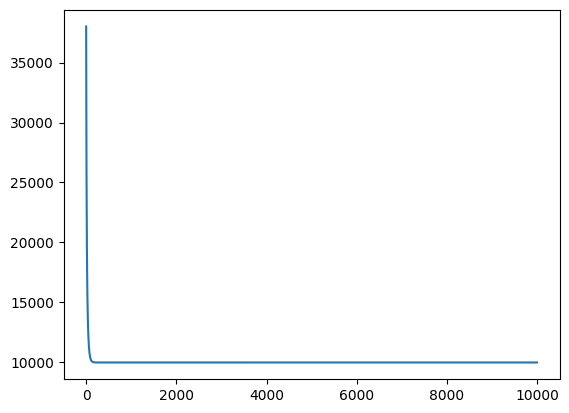

In [109]:
plt.plot(cost_track)

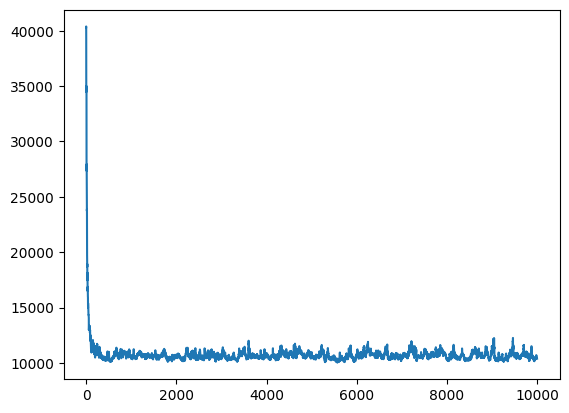

In [110]:
plt.plot(cost_trackSDG)


## Quiz

Измерьте время работы аналитического подхода, а также GD и SGD (используйте magic command [`%%time`](https://ipython.readthedocs.io/en/stable/interactive/magics.html)).

Упорядочите результаты по возрастанию.

## Тестирование моделей на реальных данных

В реальных задачах никто не пишет методы с нуля, если они уже реализованы в python. Самостоятельная реализация методов полезна для получения навыков программирования и более глубокого понимания алгоритмов.

Давайте применим уже готовые методы из `sklearn` для решения задачи регрессии.

In [145]:
data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

Разобъем данные на трейн и тест

In [146]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=TRAIN_SIZE,
    random_state=RANDOM_STATE
    )

Для решения этой задачи попробуйте следующие модели:

* `LinearRegression` из `sklearn`
* `SGDRegressor` из `sklearn`

Обучите модели на тренировочных данных с параметрами по умолчанию и сделайте предсказание на тесте.
Вычислите значение $R^2$

In [147]:
from sklearn.linear_model import SGDRegressor

In [153]:
model = LinearRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [154]:
modelSDG = SGDRegressor()
modelSDG.fit(X_train, y_train)
predictSDG = modelSDG.predict(X_test)

## Quiz

Чему равно значение $R^2$ для модели LinearRegression на тестовых данных?

Ответ округлите до сотых.

In [155]:
print(f"R2 score LinearRegression {r2_score(y_test, predict).round(2)}")
print(f"R2 score SGDRegressor {r2_score(predictSDG, y_test)}")

R2 score LinearRegression 0.61
R2 score SGDRegressor -1.4503090569033423


In [135]:
w = ManualLinearRegression.ols_solution(X_train, y_train)

predict = ManualLinearRegression.predict(X_test, w)

print(f"R2 score for monual regression {r2_score(y_test, predict).round(2)}")

R2 score for monual regression 0.61


## Quiz

Какая модель с параметрами по умолчанию лучше справилась с предсказанием стоимости домов в Калифорнии?

## Quiz

Проинтерпретируйте качество метода SGDRegressor. Выберите наиболее подходящий вариант.